# Imports

In [4]:
import h5py
import numpy as np
import pandas as pd
import os
import scipy.stats as stats

# Participants Info

In [5]:
participants_f = '/gpfs/fs1/home/l/lcl_uotkcni22/lcl_uotkcni22s2124/kcnischool2022-projectweek/data/subjinfo/participants.tsv'
participants_df = pd.read_csv(participants_f,sep='\t',index_col=0)
participants_df.head()

,Sex,AgeGroup,BMI1,BMI2,EducationLevel,HADS_Anxiety,HADS_Depression,ISI,KSQ_SleepQualityIndex,KSQ_WakeupSymptomIndex,...,PPIR_IR15,PPIR_IR40,BADD_Total,BADD_Activation,BADD_Attention,BADD_Effort,BADD_Affect,BADD_Memory,Sl_cond,Trial
participant_id,,,,,,,,,,,,,,,,,,,,,
sub-9001,Male,Young,"19,78997095","19,78997095",Studerar för närvarande på universitet/högskola,0,1,12,"4,75","4,666666667",...,11.0,29.0,16.0,6.0,2.0,2.0,6.0,0.0,2,B
sub-9002,Male,Old,"21,79944511","21,46915048",Har avslutat gymnasieskolan,2,3,9,"5,5","5,666666667",...,10.0,32.0,33.0,5.0,8.0,6.0,8.0,6.0,2,B
sub-9003,Male,Old,"20,49861496","20,49861496",Har examen från universitet/högskola,2,3,10,"5,25","5,666666667",...,12.0,26.0,13.0,4.0,4.0,4.0,1.0,0.0,1,B
sub-9004,Female,Old,"22,94811574","22,94811574",Har examen från universitet/högskola,1,2,11,"4,25","5,666666667",...,10.0,28.0,24.0,3.0,7.0,5.0,6.0,3.0,1,B
sub-9005,Male,Old,"24,75546432","24,75546432",Har avslutat gymnasieskolan,0,0,9,6,"5,666666667",...,8.0,28.0,30.0,9.0,5.0,7.0,3.0,6.0,2,B


# Modelling Data

After downloading modelling data using ses-1-model-data.py and ses-2-model-data.py, set directory for where data is downloaded

In [8]:
data_dir_ses_1 = '/gpfs/fs1/home/l/lcl_uotkcni22/lcl_uotkcni22s2124/kcnischool2022-projectweek/kcnischool2022-projectweek/scratch/ses1/ses1/'
data_dir_ses_2 = '/gpfs/fs1/home/l/lcl_uotkcni22/lcl_uotkcni22s2124/kcnischool2022-projectweek/kcnischool2022-projectweek/scratch/ses1/ses2/'


In [9]:
cd /gpfs/fs1/home/l/lcl_uotkcni22/lcl_uotkcni22s2124/kcnischool2022-projectweek/kcnischool2022-projectweek/scratch/ses1/ses2/

/gpfs/fs1/home/l/lcl_uotkcni22/lcl_uotkcni22s2124/kcnischool2022-projectweek/kcnischool2022-projectweek/scratch/ses1/ses2


In [10]:
ses_2_subs = os.listdir()

In [11]:
cd /gpfs/fs1/home/l/lcl_uotkcni22/lcl_uotkcni22s2124/kcnischool2022-projectweek/kcnischool2022-projectweek/scratch/ses1/ses1

/gpfs/fs1/home/l/lcl_uotkcni22/lcl_uotkcni22s2124/kcnischool2022-projectweek/kcnischool2022-projectweek/scratch/ses1/ses1


In [12]:
ses_1_subs = os.listdir()

In [15]:
#Variables

#Modelling variables we will be looking at
model_var = ['output_train_cA','output_train_cB','output_train_cC',
             'output_train_g','output_train_gEE','output_train_gEI',
             'output_train_gIE','output_train_gmean','output_train_gvar',
             'output_train_sigma_bold','output_train_sigma_state']
#list of subject IDs 
subs = ['9002', '9003', '9004', '9005',  '9014','9018', '9020','9023', '9025', '9026', '9028', '9029', '9032',
       '9033', '9034', '9036', '9038', '9039', '9040', '9041', '9042',
       '9045', '9046', '9047', '9048', '9049', '9055', '9058', '9061',
       '9062', '9075',
       '9079', '9080', '9081', '9084', '9085', '9086', '9087', '9088',
       '9089', '9092', '9093', '9094', '9096', '9098']

## Extract parameter variable and combine with subject info

In [51]:
#check if this works and values are no the same for eachh session
#fix what the files are called in scratch for session -1 and session 2
df_list = []
subj_var ={}
for s in subs:
    ses_1_f = h5py.File(data_dir_ses_1+'results_'+s+'.h5', 'r')
    ses_2_f = h5py.File(data_dir_ses_2+'results_'+s+'.h5', 'r')

    subj_var ={}
    for k in model_var:
        #collect ses-1 variables in subject's dictionary
        subj_var[k+'1'] = np.array(ses_1_f[k])[-1]
        #collect ses-2 variables in subject's dictionary
        subj_var[k+'2'] = np.array(ses_2_f[k])[-1]
        sub_df = pd.DataFrame(subj_var, index = ['sub-'+s])
        sub_df.index.names = ['participant_id']
    df_list.append(sub_df)
        
full_sub = pd.concat(df_list, axis=0)
model_df = pd.merge(participants_df,full_sub,left_index=True,right_index=True)

## Seperate into Sleep and Not Sleepy Subjects

In [26]:
sess_2_params = [col for col in model_df.columns.values if (col.endswith("2"))]
sess_1_params =[col for col in model_df.columns.values if (col.endswith("1"))]
sess_1_params.remove('PVTMotivation1') 
sess_1_params.remove('PVTMotivation1.1')

ses_1_model_df = model_df.drop(sess_2_params, axis=1)
recode_condition_sess_1 = ses_1_model_df['Sl_cond'].copy()
recode_condition_sess_1[recode_condition_sess_1 == 1] = "Sleepy"
recode_condition_sess_1[recode_condition_sess_1 == 2] = "Not Sleepy"
ses_1_model_df['Sl_cond'] = recode_condition_sess_1
new_cols = [col.replace("1", "") for col in ses_1_model_df.columns.values]
ses_1_model_df.columns = new_cols
sleepy_ses_1_df = ses_1_model_df[ses_1_model_df['Sl_cond'] == "Sleepy"]
nsleepy_ses_1_df = ses_1_model_df[ses_1_model_df['Sl_cond'] == "Not Sleepy"]



ses_2_model_df = model_df.drop(sess_1_params, axis=1)
recode_condition_sess_2 = ses_2_model_df['Sl_cond'].copy()
recode_condition_sess_2[recode_condition_sess_2 == 2] = "Sleepy"
recode_condition_sess_2[recode_condition_sess_2 == 1] = "Not Sleepy"
ses_2_model_df['Sl_cond'] = recode_condition_sess_2
ses_2_model_df.columns = new_cols
sleepy_ses_2_df = ses_2_model_df[ses_2_model_df['Sl_cond'] == "Sleepy"]
nsleepy_ses_2_df = ses_2_model_df[ses_2_model_df['Sl_cond'] == "Not Sleepy"]


sleepy_df = pd.concat([sleepy_ses_1_df, sleepy_ses_2_df], axis=0)
sleepy_df = sleepy_df.sort_values(by=['participant_id'])
not_sleepy_df = pd.concat([nsleepy_ses_1_df, nsleepy_ses_2_df], axis=0)
not_sleepy_df = not_sleepy_df.sort_values(by=['participant_id'])

# Paired T-test + Distribution Plots

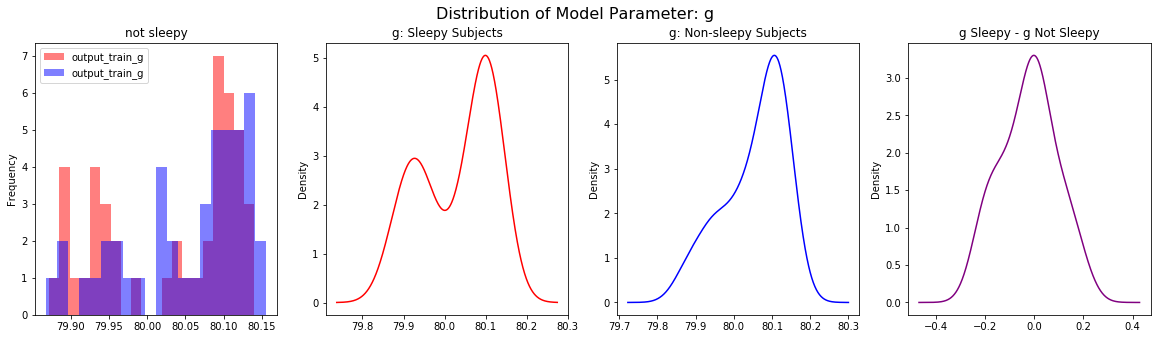

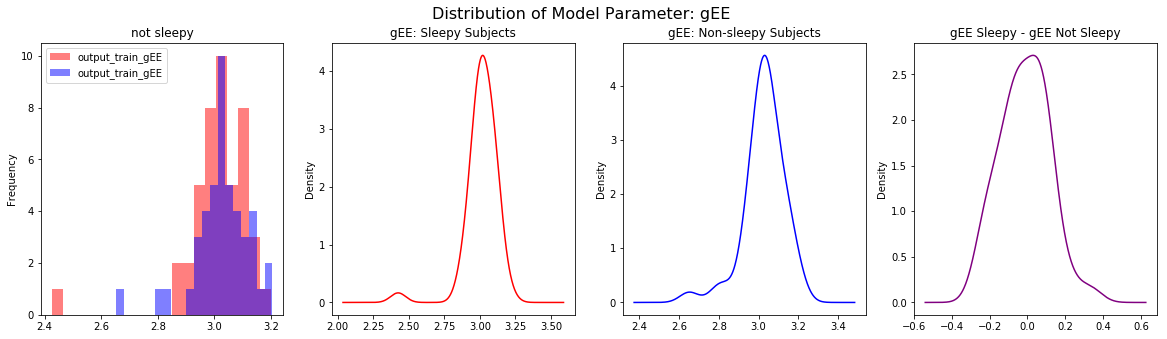

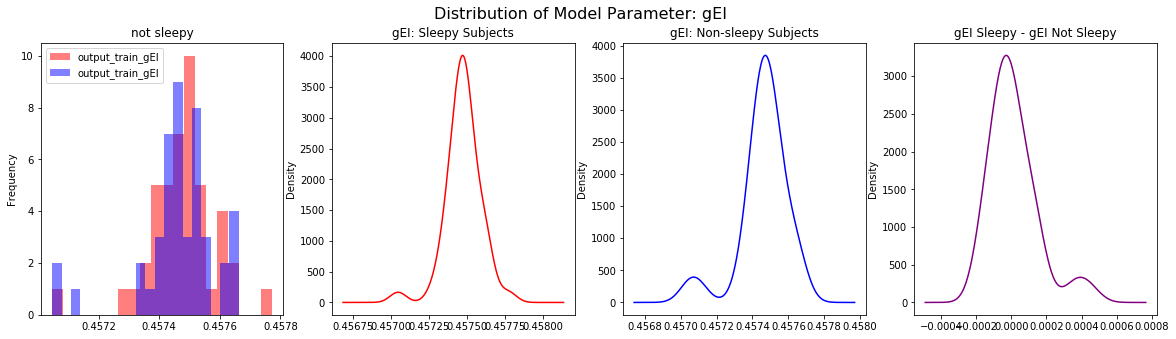

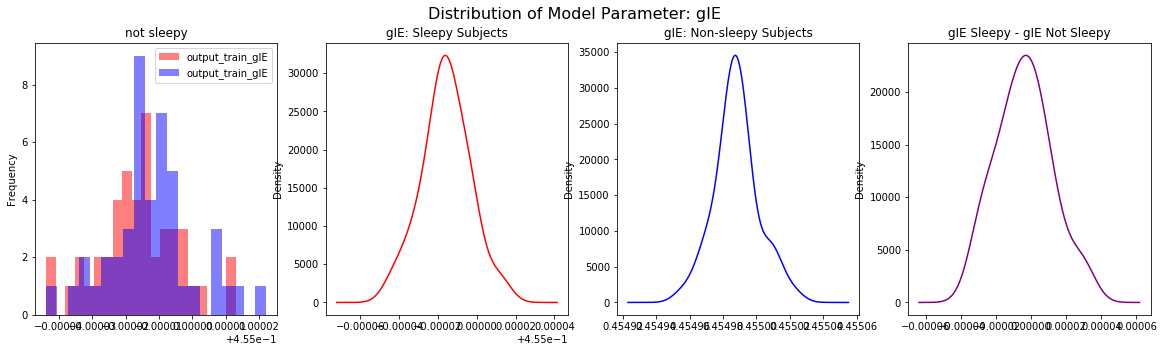

In [116]:
from matplotlib import pyplot as plt
T_test_p_value = {}
variables = ['output_train_g','output_train_gEE', 'output_train_gEI', 'output_train_gIE']
for v in variables:
    var = v[v.rfind("_")+1:]
    x = stats.ttest_rel(sleepy_df[v],not_sleepy_df[v])
    T_test_p_value[v] = x[1]
    fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
    fig.suptitle('Distribution of Model Parameter: '+var, fontsize=16)
    sleepy_df[v].plot(kind = 'hist',ax = ax1, color = 'r',alpha = 0.5, bins = 20,legend = True, title = 'sleepy')
    ax1.set_title(var+': Sleepy Subjects')
    not_sleepy_df[v].plot(kind = 'hist',ax = ax1, color = 'b',alpha = 0.5, bins = 20, legend = True, title = 'not sleepy')
    sleepy_df[v].plot(kind = 'kde',ax = ax2, color = 'r')
    ax2.set_title(var+': Sleepy Subjects')
    not_sleepy_df[v].plot(kind = 'kde',ax = ax3, color = 'b')
    ax3.set_title(var+': Non-sleepy Subjects')
    (sleepy_df[v]-not_sleepy_df[v]).plot(kind='kde', ax = ax4, color = 'purple')
    ax4.set_title(var+' Sleepy - '+var+' Not Sleepy')
    
    
#plt.tight_layout()